# Import Statements and Data Loading

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms

In [2]:
train = pd.read_csv('/mnt/c/users/efazh/DataProblems/Datasets/Tabular/Zillow/train_2016_v2.csv', 
                    parse_dates=["transactiondate"])

props = pd.read_csv('/mnt/c/users/efazh/DataProblems/Datasets/Tabular/Zillow/sampled_csvs/sampled_prop_2016.csv')
test = pd.read_csv('/mnt/c/users/efazh/DataProblems/Datasets/Tabular/Zillow/sample_submission.csv')
test= test.rename(columns={'ParcelId': 'parcelid'})

# Data Understanding

In [3]:
print("Training Set Size:", train.shape)
print("Property (2016) Set Size:", props.shape)
print("Test Size:", test.shape)

Training Set Size: (90275, 3)
Property (2016) Set Size: (597042, 58)
Test Size: (2985217, 7)


In [4]:
props.head()

,14512429,Unnamed: 1,Unnamed: 2,Unnamed: 3,0.0,0.0.1,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 48,Unnamed: 49,8004.0,8004.0.1,2015,Unnamed: 53,89.32,Unnamed: 55,Unnamed: 56,60590867014013
0,12189775,NaN,NaN,NaN,0.0,0.0,NaN,7.0,NaN,NaN,...,NaN,NaN,106466.0,236593.0,2015.0,130127.0,3168.81,NaN,NaN,6.037238e+13
1,10815139,1.0,NaN,NaN,3.0,5.0,NaN,4.0,3.0,NaN,...,NaN,NaN,507899.0,1188546.0,2015.0,680647.0,14812.36,NaN,NaN,6.037140e+13
2,12549290,NaN,NaN,NaN,2.0,2.0,NaN,7.0,2.0,NaN,...,NaN,NaN,102922.0,230607.0,2015.0,127685.0,2887.44,NaN,NaN,6.037577e+13
3,11151771,1.0,NaN,NaN,3.0,3.0,NaN,4.0,3.0,NaN,...,NaN,NaN,294264.0,490610.0,2015.0,196346.0,8572.27,NaN,NaN,6.037920e+13
4,11398838,NaN,NaN,NaN,2.0,4.0,NaN,7.0,2.0,NaN,...,NaN,NaN,77755.0,303078.0,2015.0,225323.0,4253.29,NaN,NaN,6.037601e+13


In [5]:
props.describe()

,14512429,Unnamed: 1,Unnamed: 2,Unnamed: 3,0.0,0.0.1,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 46,Unnamed: 47,Unnamed: 48,8004.0,8004.0.1,2015,Unnamed: 53,89.32,Unnamed: 56,60590867014013
count,5.970420e+05,162143.000000,1194.000000,358.000000,594731.000000,594732.000000,2511.000000,387800.000000,571366.000000,3422.0,...,537.000000,585121.000000,136453.000000,5.860250e+05,5.884990e+05,594732.000000,5.835730e+05,5.908240e+05,11518.000000,5.820110e+05
mean,1.333033e+07,1.917893,7.331658,668.195531,2.210907,3.090582,3.736758,5.786209,2.300653,66.0,...,247.467412,1964.275343,1.401098,1.716482e+05,4.217064e+05,2014.999526,2.528967e+05,5.385364e+03,13.868554,6.048418e+13
std,7.968198e+06,3.127178,2.652027,509.412768,1.080057,1.275025,0.497403,1.805506,1.003659,0.0,...,316.051561,23.425469,0.536741,4.690313e+05,8.016607e+05,0.035979,4.611655e+05,9.589342e+03,2.345310,2.162298e+11
min,1.071173e+07,1.000000,2.000000,30.000000,0.000000,0.000000,1.000000,1.000000,1.000000,66.0,...,12.000000,1801.000000,1.000000,1.000000e+00,2.000000e+00,2001.000000,2.000000e+00,2.540000e+00,2.000000,-1.000000e+00
25%,1.164399e+07,1.000000,7.000000,280.500000,2.000000,2.000000,3.000000,4.000000,2.000000,66.0,...,86.000000,1950.000000,1.000000,7.471600e+04,1.796795e+05,2015.000000,7.490000e+04,2.460020e+03,14.000000,6.037400e+13
50%,1.254420e+07,1.000000,7.000000,565.500000,2.000000,3.000000,4.000000,7.000000,2.000000,66.0,...,144.000000,1963.000000,1.000000,1.226350e+05,3.063570e+05,2015.000000,1.672050e+05,3.995700e+03,14.000000,6.037572e+13
75%,1.409732e+07,1.000000,7.000000,899.750000,3.000000,4.000000,4.000000,7.000000,3.000000,66.0,...,300.000000,1981.000000,2.000000,1.970910e+05,4.885070e+05,2015.000000,3.073830e+05,6.202580e+03,15.000000,6.059042e+13
max,1.681836e+08,13.000000,21.000000,3560.000000,20.000000,20.000000,5.000000,12.000000,20.000000,66.0,...,3668.000000,2015.000000,14.000000,2.189948e+08,2.669339e+08,2016.000000,9.024622e+07,3.399590e+06,99.000000,6.111009e+13


In [6]:
# Check data types
data_types = props.dtypes

# Print data types along with additional information
print("Data Types and Additional Information:")
for column in props.columns:
    print(f"Column: {column}")
    print(f" - Data Type: {data_types[column]}")
    print(f" - Number of Unique Values: {props[column].nunique()}")
    print(f" - Sample Values: {props[column].dropna().unique()[:5]}")  # Display first 5 unique non-null values
    print()

Data Types and Additional Information:
Column: 14512429
 - Data Type: int64
 - Number of Unique Values: 597042
 - Sample Values: [12189775 10815139 12549290 11151771 11398838]

Column: Unnamed: 1
 - Data Type: float64
 - Number of Unique Values: 7
 - Sample Values: [ 1. 13.  5. 11. 12.]

Column: Unnamed: 2
 - Data Type: float64
 - Number of Unique Values: 6
 - Sample Values: [ 8.  2.  7.  3. 21.]

Column: Unnamed: 3
 - Data Type: float64
 - Number of Unique Values: 275
 - Sample Values: [ 368.  340.  918. 1120.  766.]

Column: 0.0
 - Data Type: float64
 - Number of Unique Values: 34
 - Sample Values: [0.  3.  2.  1.5 4. ]

Column: 0.0.1
 - Data Type: float64
 - Number of Unique Values: 21
 - Sample Values: [0. 5. 2. 3. 4.]

Column: Unnamed: 6
 - Data Type: float64
 - Number of Unique Values: 5
 - Sample Values: [4. 3. 5. 2. 1.]

Column: Unnamed: 7
 - Data Type: float64
 - Number of Unique Values: 10
 - Sample Values: [ 7.  4.  1. 10. 12.]

Column: Unnamed: 8
 - Data Type: float64
 - Nu

In [24]:
# Let's look at the training set
train.head()

,parcelid,logerror,transactiondate
0,11016594,0.0276,2016-01-01
1,14366692,-0.1684,2016-01-01
2,12098116,-0.0040,2016-01-01
3,12643413,0.0218,2016-01-02
4,14432541,-0.0050,2016-01-02


# Data Cleaning

In [15]:
miss_vals = props.isnull().sum()
print('Missing Value in properties_2016:\n', miss_vals[miss_vals > 0])

Missing Value in properties_2016:
 Unnamed: 1          434899
Unnamed: 2          595848
Unnamed: 3          596684
0.0                   2311
0.0.1                 2310
Unnamed: 6          594531
Unnamed: 7          209242
Unnamed: 8           25676
Unnamed: 9          593620
Unnamed: 10         556400
Unnamed: 11          10947
Unnamed: 12          54950
Unnamed: 13         595463
Unnamed: 14         559005
Unnamed: 15         556400
Unnamed: 16         592654
06059                 2309
Unnamed: 18         534330
Unnamed: 19          25676
Unnamed: 20         420261
Unnamed: 21         420261
Unnamed: 22         583191
Unnamed: 23         235890
33852200              2309
-117950000            2309
Unnamed: 26          55044
Unnamed: 27         493994
Unnamed: 28         591485
Unnamed: 29         589660
Unnamed: 30         590573
Unnamed: 31         500463
71                    2477
263                   2309
Unnamed: 34         201382
060590867.014011      2309
16764               

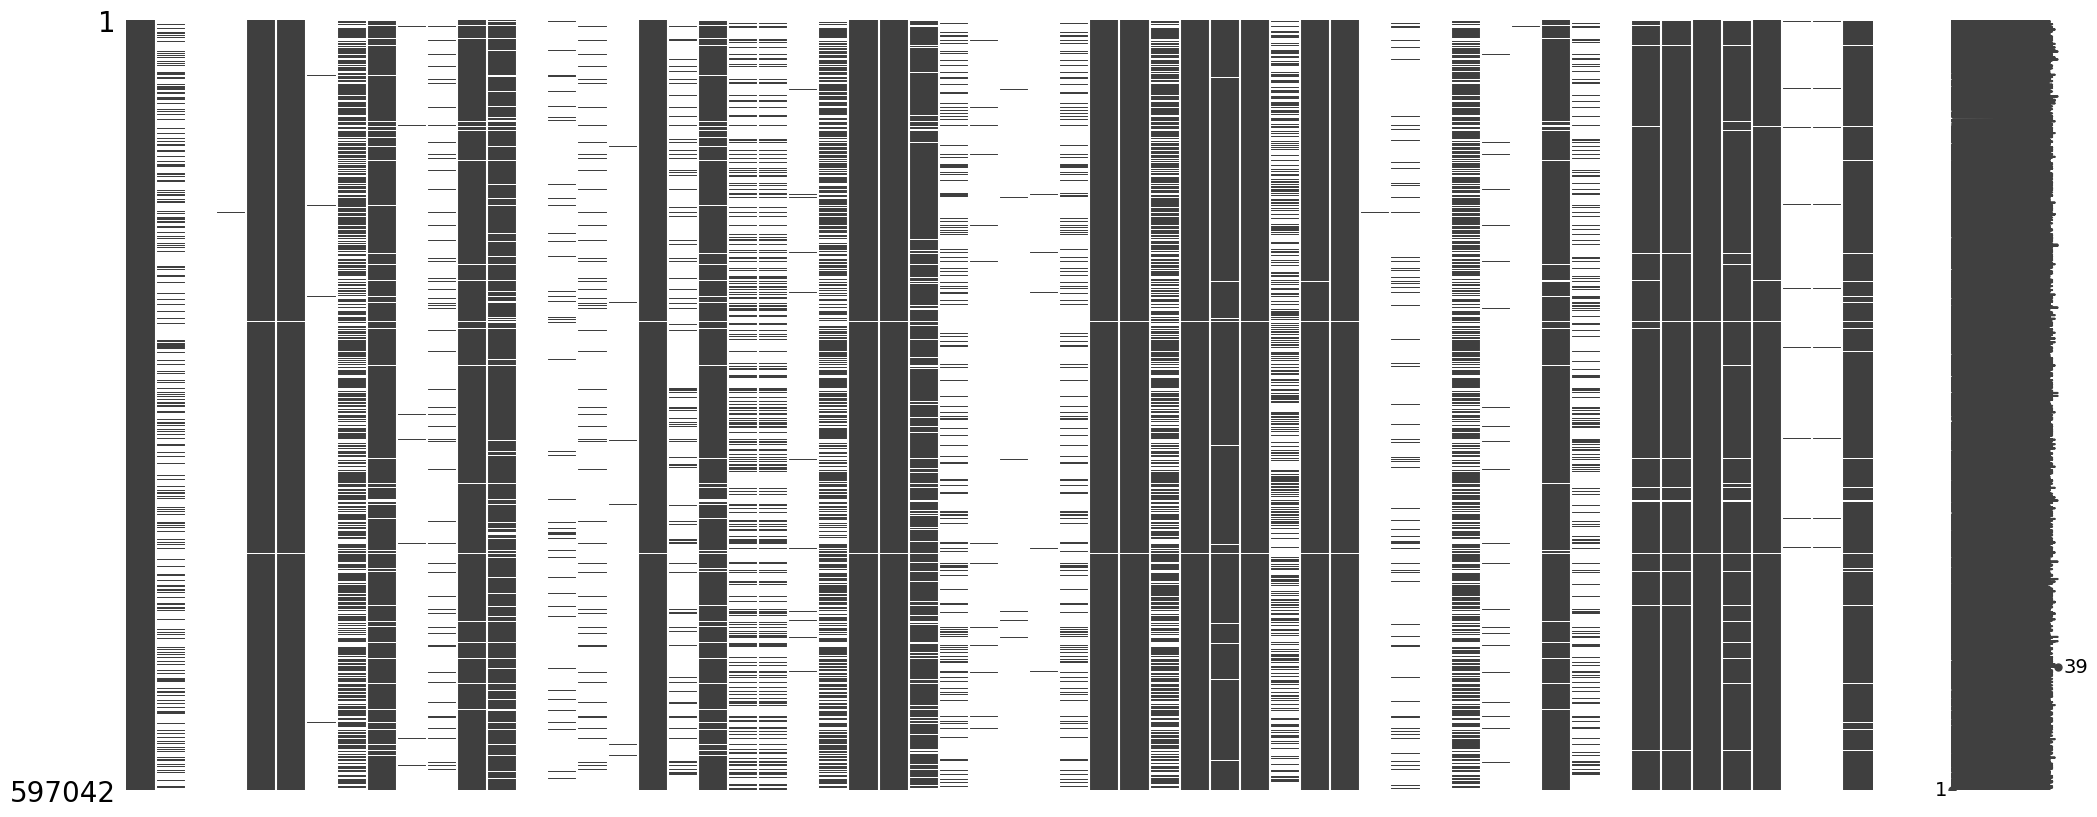

In [16]:
ms.matrix(props)
plt.show()

In [20]:
# props = props.drop(columns='14512429')
duplicates= props.duplicated().sum()
print("Number of Duplicated Entries: ",duplicates)

Number of Duplicated Entries:  3683


In [22]:
props = props.drop_duplicates()
props.head()

,Unnamed: 1,Unnamed: 2,Unnamed: 3,0.0,0.0.1,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,...,Unnamed: 48,Unnamed: 49,8004.0,8004.0.1,2015,Unnamed: 53,89.32,Unnamed: 55,Unnamed: 56,60590867014013
0,NaN,NaN,NaN,0.0,0.0,NaN,7.0,NaN,NaN,NaN,...,NaN,NaN,106466.0,236593.0,2015.0,130127.0,3168.81,NaN,NaN,6.037238e+13
1,1.0,NaN,NaN,3.0,5.0,NaN,4.0,3.0,NaN,NaN,...,NaN,NaN,507899.0,1188546.0,2015.0,680647.0,14812.36,NaN,NaN,6.037140e+13
2,NaN,NaN,NaN,2.0,2.0,NaN,7.0,2.0,NaN,NaN,...,NaN,NaN,102922.0,230607.0,2015.0,127685.0,2887.44,NaN,NaN,6.037577e+13
3,1.0,NaN,NaN,3.0,3.0,NaN,4.0,3.0,NaN,NaN,...,NaN,NaN,294264.0,490610.0,2015.0,196346.0,8572.27,NaN,NaN,6.037920e+13
4,NaN,NaN,NaN,2.0,4.0,NaN,7.0,2.0,NaN,NaN,...,NaN,NaN,77755.0,303078.0,2015.0,225323.0,4253.29,NaN,NaN,6.037601e+13


In [23]:
# merging train and properties datasets
train_df = pd.merge(train, props, how = 'left', on = 'parcelid')
train_df.head()

KeyError: 'parcelid'